In [9]:
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import csv

dataset_URL = "https://raw.githubusercontent.com/CheMBurN695/FinCrime_ML_Model/refs/heads/master/Trnx_Dataset.csv?token=GHSAT0AAAAAACYPUMUJT3IM6CAWCKWPPIDEZ3IRX6Q"
testing_dataset_URL = "https://raw.githubusercontent.com/CheMBurN695/FinCrime_ML_Model/refs/heads/master/Testing_Dataset.csv?token=GHSAT0AAAAAACYPUMUI6IF7VZEW3IITYWSWZ3ITRMA"
training_dataset_URL = "https://raw.githubusercontent.com/CheMBurN695/FinCrime_ML_Model/refs/heads/master/Training_Dataset.csv?token=GHSAT0AAAAAACYPUMUJW4YEFAPCRGSUTEZMZ3ITQ6Q"
dataFrame = pd.read_csv("Trnx_Dataset_v2.csv")
training_dataFrame = pd.read_csv("Training_Dataset.csv")
testing_dataFrame = pd.read_csv("Testing_Dataset.csv")

In [10]:
sowByCountry = dataFrame.groupby(["Country", "Source of Money"]).size()


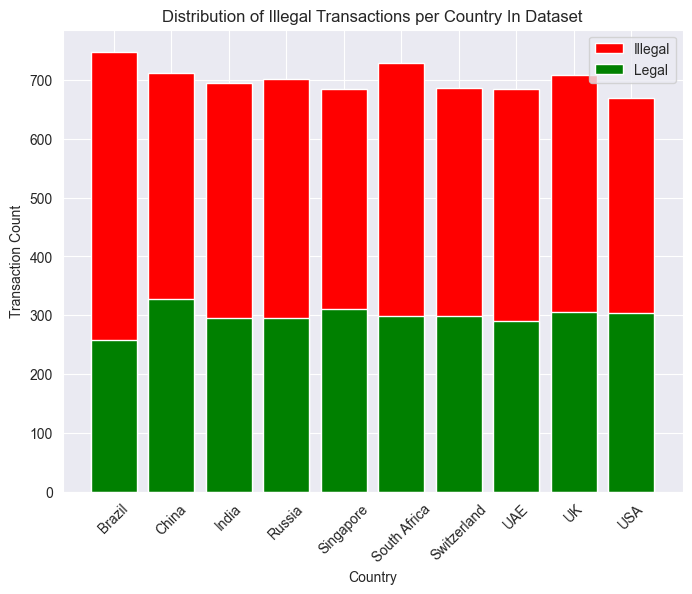

In [11]:
country_count = dataFrame.groupby(["Country"]).size()
illegal_trnxs = dataFrame['Source of Money'] == "Illegal"
illegal_trnx_byCountry = dataFrame[illegal_trnxs].groupby(["Country"]).size()
not_illegal_trnx_byCountry = country_count - illegal_trnx_byCountry
percent_illegal = (illegal_trnx_byCountry / country_count) * 100
percent_legal = (not_illegal_trnx_byCountry / country_count) * 100

_fig, _axes = pyplot.subplots(figsize=(8,6))
_axes.bar(illegal_trnx_byCountry.index, illegal_trnx_byCountry, color='red', label="Illegal")
_axes.bar(not_illegal_trnx_byCountry.index, not_illegal_trnx_byCountry, color='green', label="Legal")

_axes.set_title("Distribution of Illegal Transactions per Country In Dataset")
_axes.set_xlabel("Country")
_axes.set_ylabel("Transaction Count")
_axes.set_xticks(country_count.index)
_axes.set_xticklabels(country_count.index, rotation=45)
_axes.legend()
pyplot.show()


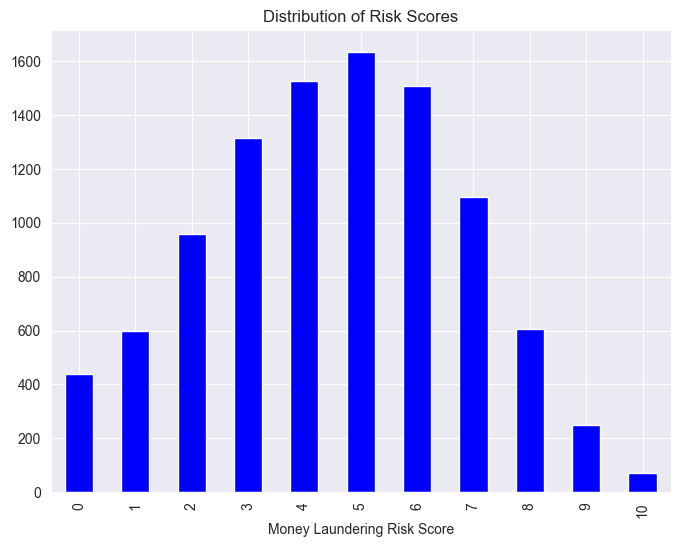

In [12]:
# Distribution of Risk scores
transaction_count  = dataFrame.groupby(["Money Laundering Risk Score"]).size()
transaction_count = transaction_count.sort_index()
transaction_count.plot(kind='bar', figsize=(8,6), color='blue')
pyplot.title("Distribution of Risk Scores")
pyplot.show()

In [13]:
label_encoder_country = LabelEncoder()
label_encoder_destination_country = LabelEncoder()
label_encoder_transaction_type = LabelEncoder()
label_encoder_person_involved = LabelEncoder()
label_encoder_industry = LabelEncoder()
label_encoder_source_of_money = LabelEncoder()
label_encoder_ML_score = LabelEncoder()
label_encoder_ML_class = LabelEncoder()
label_encoder_shellCosInvolved = LabelEncoder()

label_encoder_country.fit(dataFrame['Country'])
label_encoder_destination_country.fit(dataFrame['Destination Country'])
label_encoder_transaction_type.fit(dataFrame['Transaction Type'])
label_encoder_person_involved.fit(dataFrame['Person Involved'])
label_encoder_industry.fit(dataFrame['Industry'])
label_encoder_source_of_money.fit(dataFrame['Source of Money'])
label_encoder_ML_score.fit(dataFrame['Money Laundering Risk Score'])
label_encoder_ML_class.fit(dataFrame['Risk_Classification'])
label_encoder_shellCosInvolved.fit(dataFrame['Shell Companies Involved'])

training_dataFrame['Country'] = label_encoder_country.transform(training_dataFrame['Country'])
training_dataFrame['Destination Country'] = label_encoder_destination_country.transform(training_dataFrame['Destination Country'])
training_dataFrame['Transaction Type'] = label_encoder_transaction_type.transform(training_dataFrame['Transaction Type'])
training_dataFrame['Person Involved'] = label_encoder_person_involved.transform(training_dataFrame['Person Involved'])
training_dataFrame['Industry'] = label_encoder_industry.transform(training_dataFrame['Industry'])
training_dataFrame['Source of Money'] = label_encoder_source_of_money.transform(training_dataFrame['Source of Money'])
training_dataFrame['Money Laundering Risk Score'] = label_encoder_ML_score.transform(training_dataFrame['Money Laundering Risk Score'])
training_dataFrame['Risk_Classification'] = label_encoder_ML_class.transform(training_dataFrame['Risk_Classification'])
training_dataFrame['Shell Companies Involved'] = label_encoder_shellCosInvolved.transform(training_dataFrame['Shell Companies Involved'])

# X = training_dataFrame[['Country', 'Destination Country', 'Transaction Type', 'Person Involved', 'Industry', 'Source of Money', 'Shell Companies Involved']]
X = training_dataFrame[['Country', 'Destination Country', 'Person Involved', 'Industry', 'Source of Money', 'Shell Companies Involved']]
Y = training_dataFrame['Risk_Classification']

In [14]:
# testing data

testing_dataFrame['Country'] = label_encoder_country.transform(testing_dataFrame['Country'])
testing_dataFrame['Destination Country'] = label_encoder_destination_country.transform(testing_dataFrame['Destination Country'])
testing_dataFrame['Transaction Type'] = label_encoder_transaction_type.transform(testing_dataFrame['Transaction Type'])
testing_dataFrame['Person Involved'] = label_encoder_person_involved.transform(testing_dataFrame['Person Involved'])
testing_dataFrame['Industry'] = label_encoder_industry.transform(testing_dataFrame['Industry'])
testing_dataFrame['Source of Money'] = label_encoder_source_of_money.transform(testing_dataFrame['Source of Money'])
testing_dataFrame['Money Laundering Risk Score'] = label_encoder_ML_score.transform(testing_dataFrame['Money Laundering Risk Score'])
testing_dataFrame['Risk_Classification'] = label_encoder_ML_class.transform(testing_dataFrame['Risk_Classification'])
testing_dataFrame['Shell Companies Involved'] = label_encoder_shellCosInvolved.transform(testing_dataFrame['Shell Companies Involved'])

X_test = testing_dataFrame[['Country', 'Destination Country', 'Person Involved', 'Industry', 'Source of Money', 'Shell Companies Involved']]
Y_test = testing_dataFrame['Risk_Classification']


In [15]:
model = LogisticRegression(max_iter=1000)
model.fit(X,Y)

LogisticRegression(max_iter=1000)

In [16]:
predictions = model.predict(X_test)

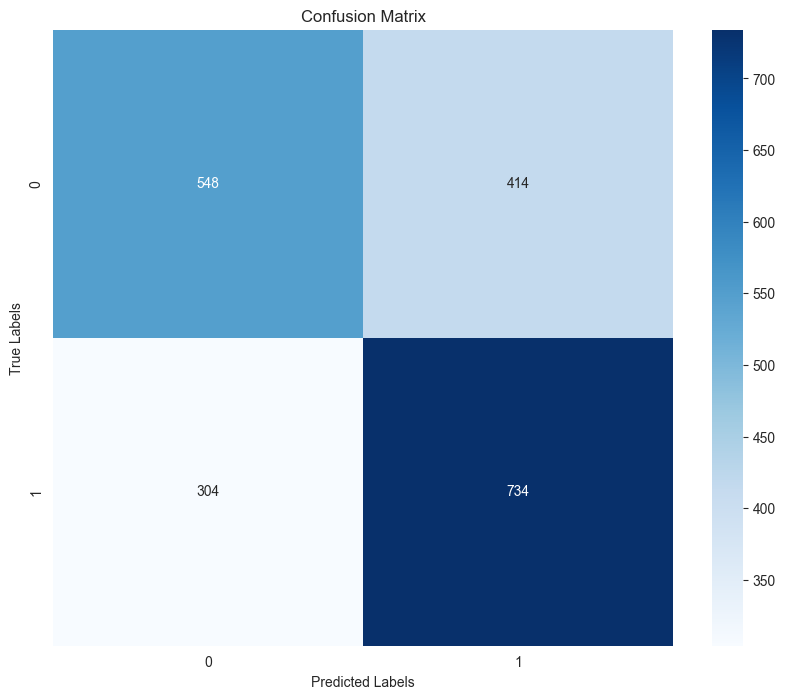

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.57      0.60       962
           1       0.64      0.71      0.67      1038

    accuracy                           0.64      2000
   macro avg       0.64      0.64      0.64      2000
weighted avg       0.64      0.64      0.64      2000



In [17]:

conf_matrix = confusion_matrix(Y_test, predictions)
pyplot.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

pyplot.xlabel('Predicted Labels')
pyplot.ylabel('True Labels')
pyplot.title('Confusion Matrix')
pyplot.show()

report = classification_report(Y_test, predictions, zero_division=1)
print("Classification Report:")
print(report)